# Case Study 1 : Collecting Data from Twitter

Due Date: 1/27/2020, **BEFORE the beginning of class at 11:00am**

## **NOTE: There are *always* last minute issues submitting the case studies.  DO NOT WAIT UNTIL THE LAST MINUTE!**

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/9/9f/Twitter_bird_logo_2012.svg/220px-Twitter_bird_logo_2012.svg.png">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Irean Ali
    
    Achu Balasubramanian
    
    Josh Lovering

**Suggested Readings:** 
* Chapter 1 and Chapter 9 of the book "Mining the Social Web" can help a lot if you get stuck. 
* In fact, it is intentional that many of these questions can be answered directly from there (except for question 4)!
* The idea is to ease you into the case studies :-)

**Don't forget!**
* You will need to install the python-twitter library to access the Twitter API
 * pip install twitter


** NOTE **
* **Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost**.

# Problem 1: Sampling Twitter Data with Streaming API about a certain topic

* Select a topic that you are interested in, for example, "WPI" or "Lady Gaga"
* Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [220]:
import twitter
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Prof. Paffenroth has a developer account for the class.  He will provide the Twitter access tokens for
    # each team
    # See https://developer.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = "QoTiAk8g8Hm9Zhejyt1GxF9Bp"
    CONSUMER_SECRET = "Lj6Hg1XlDcKeT2pFNS330vN7RqgRzxHpsUovESMd9braCZ4WGO"
    # Open Authorizan
    OAUTH_TOKEN = "571213367-dPdnChuVRjwRHoqfH0pi15IbgGhJmRoKxJjrP9wD"
    OAUTH_TOKEN_SECRET = "3cp8koRc8EKcVn3DkI0HoGquXJWMnAYgU7pzMiMnNq3jq"
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

twitter_api = oauth_login()
# print(twitter_api)

In [221]:
# Looked through worldwide trends to pick a topic

WORLD_WOE_ID = 1
#Where on earth - entire world
US_WOE_ID = 23424977
#retrieve world and US trends
#Where on earth - United States
world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
#creates listt of Python dictionaries from API
us_trends = twitter_api.trends.place(_id=US_WOE_ID)
# print(world_trends)
# print()
# print(us_trends)


In [222]:
import json

# print(json.dumps(world_trends, indent=1))
# dumps dictionarys into json format
# print()
# print (json.dumps(us_trends, indent=1))

query = 'Liverpool' #chosen trend to search live tweets

count = 100 # number of recent tweets per page

search_results = twitter_api.search.tweets(q=query, count=count, result_types='recent')

statuses = search_results['statuses']
#iterates through batch of 300 tweets

#iterates through 5 more batches
for _ in range(5):
    # print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except(KeyError): # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
# print(json.dumps(statuses[0], indent=1))



In [223]:
len(statuses)

600

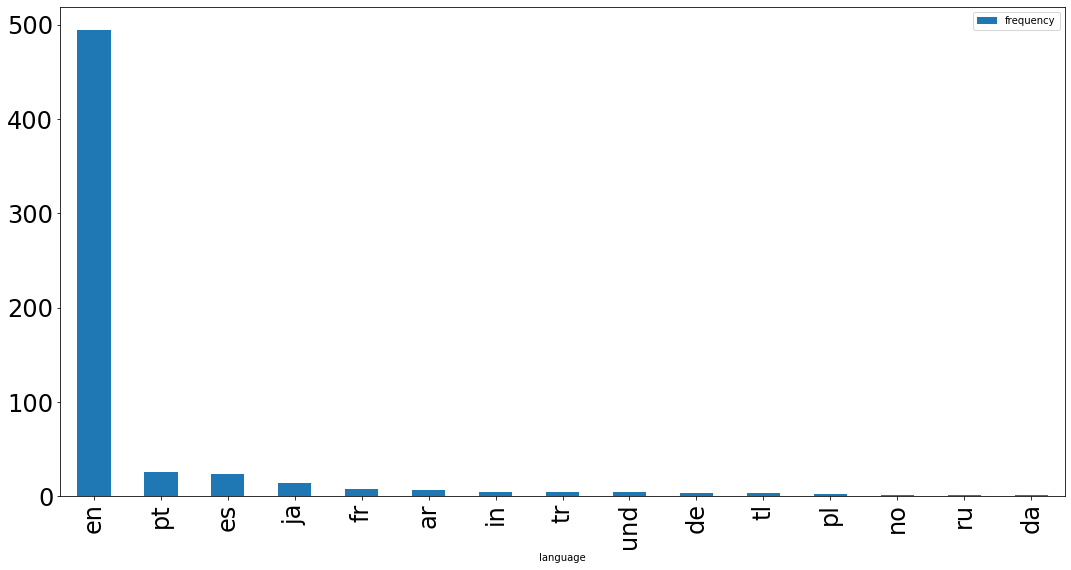

In [552]:
import pandas as pd
import matplotlib.pyplot as plt


#store the tweets
with open('liverpool.json', 'w') as jsonfile:
    json.dump(statuses, jsonfile, indent=1)

lang_dict = {}
for tweet in statuses:
    if tweet['lang'] in lang_dict:
        lang_dict[tweet['lang']] += 1
    else:
        lang_dict[tweet['lang']] = 1

lang_list = [(k, v) for k, v in lang_dict.items()] 
lang_list.sort(key = lambda x: x[1], reverse = True)

df = pd.DataFrame(lang_list, columns=['language', 'frequency'])
df.plot(kind='bar', x='language', figsize = (18,9))
plt.tick_params(labelsize = 24)

### Report some statistics about the tweets you collected 

* The topic of interest: Liverpool

* The total number of tweets collected: 600

* Tweets in English: 500

*-----------------------

# Problem 2: Analyzing Tweets and Tweet Entities with Frequency Analysis

**1. Word Count:** 
* Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 words with their counts

In [231]:
#----------------------------------------------
with open('liverpool.json', 'r') as jsonfile:
    statuses_loaded = json.load(jsonfile)

#extracting text from the tweets
status_texts = [ status['text'] 
                 for status in statuses_loaded ]
#extracting user mention screen names from the tweets
screen_names = [ user_mention['screen_name'] 
                 for status in statuses_loaded
                     for user_mention in status['entities']['user_mentions'] ]
#extracting hashtags from the tweets
hashtags = [ hashtag['text'] 
             for status in statuses_loaded
                 for hashtag in status['entities']['hashtags'] ]
#collect all words from all of the tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]
#print first 5 items for text and words
# print(json.dumps(status_texts[0:5], indent=1))
# print(json.dumps(words[0:5], indent=1))

In [76]:
from collections import Counter
#creates frequency distribution from all of the words
# for item in [words]:
#     c = Counter(item)
#     print(c.most_common()[:30]) # top 10
#     print()

from prettytable import PrettyTable
# display tuples of words and count of words in a table using PrettyTable
for label, data in (('Word', words),):
    #for each word in words
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common(30) ]
    #add row with word and count
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print (pt)

+------------+-------+
| Word       | Count |
+------------+-------+
| RT         |   409 |
| Liverpool  |   399 |
| the        |   274 |
| to         |   188 |
| a          |   183 |
| in         |   168 |
| of         |   101 |
| have       |    96 |
| and        |    89 |
| at         |    74 |
| is         |    69 |
| de         |    65 |
| are        |    64 |
| United     |    63 |
| Premier    |    54 |
| Manchester |    53 |
| for        |    52 |
| I          |    52 |
| this       |    50 |
| -          |    50 |
| on         |    49 |
| The        |    46 |
| be         |    46 |
| team       |    45 |
| it         |    43 |
| he         |    41 |
| Man        |    40 |
| will       |    38 |
| as         |    37 |
| has        |    37 |
+------------+-------+


**2. Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.


In [232]:
#----------------------------------------------
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses_loaded 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status
           ]

# Slice off the first 10 from the sorted results (reverse = highest to lowest) and display 
# each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
#turn retweets into a set to remove duplicates

[ pt.add_row(row) for row in sorted(set(retweets), reverse=True)[:10] ]
# add a row containing the next tuple
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+-----------------+----------------------------------------------------+
| Count | Screen Name     | Text                                               |
+-------+-----------------+----------------------------------------------------+
| 6990  | KOT4Q           | RT @KOT4Q: The Spurs and Raptors both take 24      |
|       |                 | second violations in honor of Kobe Bryant while    |
|       |                 | the crowd chants “KOBE!”                           |
|       |                 |                                                    |
|       |                 | 🐍 https://t.co/MQq…                                |
| 2948  | HarrisonCOYS    | RT @HarrisonCOYS: Neymar tribute to Kobe in his    |
|       |                 | celebration. https://t.co/pCZFSkskhj               |
| 2947  | TommySledge     | RT @TommySledge: Watching Kobe Bryant on ‘Jimmy    |
|       |                 | Kimmel Live’ gushing about his daughter, Gianna,   |
|       |                 | 

**3. Find the most popular Tweet Entities in your collection of tweets**

Please plot a table of the top 10 hashtags, top 10 user mentions that are the most popular in your collection of tweets.

In [233]:
#----------------------------------------------
from prettytable import PrettyTable

#Display tuples of (screen names, counts) and (hashtags, counts)
for label, data in ( 
                    ('User Mention Name', screen_names), 
                    ('Hashtag', hashtags)):
    #for each name in screen_names and hashtag in hashtags
    #add a new row with the tuple displayed in the table
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [pt.add_row(kv) for kv in c.most_common(10)]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+-------------------+-------+
| User Mention Name | Count |
+-------------------+-------+
| TrollFootball     |    43 |
| FCBarcelona       |    38 |
| kobebryant        |    35 |
| Oisq_             |    18 |
| SxneSZN           |    15 |
| ElTuiterMaTador   |    14 |
| Curiosidades_PL   |    11 |
| brfootball        |    10 |
| ElliotHackney     |     9 |
| ricardouribarr1   |     8 |
+-------------------+-------+
+----------------------+-------+
| Hashtag              | Count |
+----------------------+-------+
| Liverpool            |    12 |
| FACup                |     7 |
| PongamosUnaFotoDeCFK |     6 |
| liverpool            |     4 |
| LFC                  |     4 |
| Cujo                 |     2 |
| missing              |     2 |
| BreezeHill           |     2 |
| Walton               |     2 |
| L9                   |     2 |
+----------------------+-------+


* ------------------------

# Problem 3: Getting "All" friends and "All" followers of a popular user in twitter


* choose a popular twitter user who has many followers, such as "ladygaga".
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [234]:
import sys
import time
from urllib.request import URLError
from http.client import BadStatusLine
import json
import twitter

def make_twitter_request(twitter_api_func, max_errors=10, *args, **kw): 
    
    # A nested helper function that handles common HTTPErrors. Return an updated
    # value for wait_period if the problem is a 500 level error. Block until the
    # rate limit is reset if it's a rate limiting issue (429 error). Returns None
    # for 401 and 404 errors, which requires special handling by the caller.
    def handle_twitter_http_error(e, wait_period=2, sleep_when_rate_limited=True):
    
        if wait_period > 3600: # Seconds
            print >> sys.stderr, 'Too many retries. Quitting.'
            raise e
    
        # See https://dev.twitter.com/docs/error-codes-responses for common codes
    
        if e.e.code == 401:
            print >> sys.stderr, 'Encountered 401 Error (Not Authorized)'
            return None
        elif e.e.code == 404:
            print >> sys.stderr, 'Encountered 404 Error (Not Found)'
            return None
        elif e.e.code == 429: 
            print >> sys.stderr, 'Encountered 429 Error (Rate Limit Exceeded)'
            if sleep_when_rate_limited:
                print >> sys.stderr, "Retrying in 15 minutes...ZzZ..."
                sys.stderr.flush()
                time.sleep(60*15 + 5)
                print >> sys.stderr, '...ZzZ...Awake now and trying again.'
                return 2
            else:
                raise e # Caller must handle the rate limiting issue
        elif e.e.code in (500, 502, 503, 504):
            print >> sys.stderr, 'Encountered %i Error. Retrying in %i seconds' % \
                (e.e.code, wait_period)
            time.sleep(wait_period)
            wait_period *= 1.5
            return wait_period
        else:
            raise e

    # End of nested helper function
    
    wait_period = 2 
    error_count = 0 

    while True:
        try:
            return twitter_api_func(*args, **kw)
        except(twitter.api.TwitterHTTPError, e):
            error_count = 0 
            wait_period = handle_twitter_http_error(e, wait_period)
            if wait_period is None:
                return
        except(URLError, e):
            error_count += 1
            print >> sys.stderr, "URLError encountered. Continuing."
            if error_count > max_errors:
                print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise
        except(BadStatusLine, e):
            error_count += 1
            print >> sys.stderr, "BadStatusLine encountered. Continuing."
            if error_count > max_errors:
                print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise

# Sample usage

twitter_api = oauth_login()

# See https://dev.twitter.com/docs/api/1.1/get/users/lookup for 
# twitter_api.users.lookup

response = make_twitter_request(twitter_api.users.lookup, 
                                screen_name="WPI")

# print(json.dumps(response, indent=1))

In [ ]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

from prettytable import PrettyTable
from functools import partial
from sys import maxsize

def get_friends_followers_ids(twitter_api, screen_name=None, user_id=None,
                              friends_limit=maxsize, followers_limit=maxsize):
    
    # Must have either screen_name or user_id (logical xor)
    assert (screen_name != None) != (user_id != None), \
    "Must have screen_name or user_id, but not both"
    
    get_friends_ids = partial(make_twitter_request, twitter_api.friends.list, 
                              count=5000)
    get_followers_ids = partial(make_twitter_request, twitter_api.followers.list, 
                                count=5000)#how many to search at a time

    friends_ids, followers_ids = [], []
    
    for twitter_api_func, limit, ids, label in [
                    [get_friends_ids, friends_limit, friends_ids, "friends"], 
                    [get_followers_ids, followers_limit, followers_ids, "followers"]
                ]:
        
        if limit == 0: continue
        
        cursor = -1
        while cursor != 0:
        
            # Use make_twitter_request via the partially bound callable...
            if screen_name: 
                response = twitter_api_func(screen_name=screen_name, cursor=cursor)
            else: # user_id
                response = twitter_api_func(user_id=user_id, cursor=cursor)

            if response is not None:
                ids += response['users']
                cursor = response['next_cursor']
        
#             print >> sys.stderr, 'Fetched {0} total {1} ids for {2}'.format(len(ids), 
#                                                     label, (user_id or screen_name))
#             print(f"Fetched {len(ids)} total {label} ids for {user_id or screen_name}")
        
            # XXX: You may want to store data during each iteration to provide an 
            # an additional layer of protection from exceptional circumstances
        
            if len(ids) >= limit or response is None:
                break

    # Do something useful with the IDs, like store them to disk...
    return friends_ids[:friends_limit], followers_ids[:followers_limit]
    # Sample usage

twitter_api = oauth_login()

friends_ids, followers_ids = get_friends_followers_ids(twitter_api, 
                                                       screen_name="JoejoeLotima")

In [235]:
friends_tuples = []
followers_tuples = []


for friend, follower in zip(friends_ids[:20], followers_ids[:20]):
    friends_tuples.append((friend['id_str'],friend['screen_name']))
    followers_tuples.append((follower['id_str'],follower['screen_name']))

friends_pt = PrettyTable()
friends_pt.field_names = ['Friend ID', 'Friend Screen Name']

for friend_id, friend_screen_name in friends_tuples:
    friends_pt.add_row([friend_id, friend_screen_name])
        
friends_pt.align['Friend ID'], friends_pt.align['Friend Screen Name'] = 'l', 'r' # Set column alignment

followers_pt = PrettyTable()
followers_pt.field_names = ['Follower ID', 'Follower Screen Name']

for follower_id, follower_screen_name in followers_tuples:
    followers_pt.add_row([follower_id, follower_screen_name])
        
followers_pt.align['Follower ID'], followers_pt.align['Follower Screen Name'] = 'l', 'r' # Set column alignment

print(friends_pt)
print(followers_pt)

+---------------------+--------------------+
| Friend ID           | Friend Screen Name |
+---------------------+--------------------+
| 1145671199403339781 |        rarambulaaa |
| 2819873472          |     gabrielxavvier |
| 1146605988          |          Ladyfea21 |
| 949421669298315264  |            AFinau5 |
| 3126480752          |          BWinner12 |
| 1211203965213237249 |       thrill_lillz |
| 854945730607235073  |    scar_morales420 |
| 1206838433345409024 |       SugarBabyDeA |
| 1054492632792080384 |            dws2405 |
| 835962058340503554  |     findley_rachel |
| 1204988622727831553 |             Axs_io |
| 863755677201772544  |        Mon_icaax23 |
| 1088864763831115780 |       tweetsbyshat |
| 4831176184          |         chuumariee |
| 927725447646810112  |             aavi_y |
| 288549122           |       __queenliaah |
| 321202648           |           ceeekopo |
| 2380640288          |        briiidiaz13 |
| 1170570483399413760 |     FrancisAngulo5 |
| 10916664

In [236]:
import json

with open('friends_ids.json', 'w') as jsonfile:
    json.dump(friends_ids, jsonfile, indent=1)
with open('followers_ids.json', 'w') as jsonfile:
    json.dump(followers_ids, jsonfile, indent=1)
    
    
with open('friends_ids.json', 'r') as jsonfile:
    friends_loaded = json.load(jsonfile)
with open('followers_ids.json', 'r') as jsonfile:
    followers_loaded = json.load(jsonfile)    

* Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table

In [238]:
#----------------------------------------------

# Turned the friends and followers into sets
# Calculated the intersection of the two sets to arrive at mutual friends

friends_set = set(friends_tuples)
followers_set = set(followers_tuples)
mutual_friends = friends_set.intersection(followers_set)

mutual_pt = PrettyTable()
mutual_pt.field_names = ['Mutual Friend ID', 'Friend Screen Name']

for friend_id, friend_screen_name in mutual_friends:
    mutual_pt.add_row([friend_id, friend_screen_name])
        
mutual_pt.align['Mutual Friend ID'], mutual_pt.align['Friend Screen Name'] = 'l', 'r' # Set column alignment
print(mutual_pt)

+---------------------+--------------------+
| Mutual Friend ID    | Friend Screen Name |
+---------------------+--------------------+
| 1211203965213237249 |       thrill_lillz |
| 854945730607235073  |    scar_morales420 |
| 927725447646810112  |             aavi_y |
| 4831176184          |         chuumariee |
| 1170570483399413760 |     FrancisAngulo5 |
| 2819873472          |     gabrielxavvier |
| 1091666411577987073 |        DillPickllz |
| 949421669298315264  |            AFinau5 |
| 835962058340503554  |     findley_rachel |
| 321202648           |           ceeekopo |
| 1054492632792080384 |            dws2405 |
| 2380640288          |        briiidiaz13 |
| 863755677201772544  |        Mon_icaax23 |
| 1088864763831115780 |       tweetsbyshat |
| 288549122           |       __queenliaah |
| 1206838433345409024 |       SugarBabyDeA |
| 1145671199403339781 |        rarambulaaa |
| 1204988622727831553 |             Axs_io |
+---------------------+--------------------+


*------------------------

# Problem 4: Business question 

Run some additional experiments with your data to gain familiarity with the twitter data and twitter API.

* Come up with a business question that Twitter data could help answer.
* Decribe the business case.
* How could Twitter data help a company decide how to spend its resources.

In [ ]:
# Question: How can WPI improve its Twitter engagement?
# Business Case: To increase WPI's popularity, specifically with retweets and likes
# How could Twitter data help: We can compare WPI's engagement with that of other tech institutions and colleges in the area

In [541]:
# University Twitter Handles
uni_list = ["WPI", "RPI", "RITtigers", "Northeastern", "UofNH", "BU_Tweets", "WorcesterState", "BeckerCollege", "Caltech", "JohnsHopkins", "UTAustin", "UCBerkeley", "virginia_tech"]

In [542]:
#----------------------------------------------
def harvest_user_timeline(twitter_api, screen_name=None, user_id=None, max_results=1000):
     
    assert (screen_name != None) != (user_id != None), \
    "Must have screen_name or user_id, but not both"    
    
    kw = {  # Keyword args for the Twitter API call
        'count': 200,
        'trim_user': 'true',
        'include_rts' : 'false',
        'since_id' : 1
        }
    
    if screen_name:
        kw['screen_name'] = screen_name
    else:
        kw['user_id'] = user_id
        
    # based on the latest 3200 tweets    
    max_pages = 16
    results = []
    
    tweets = make_twitter_request(twitter_api.statuses.user_timeline, **kw)
    
    if tweets is None: # 401 (Not Authorized) - Need to bail out on loop entry
        tweets = []
        
    results += tweets
    
    page_num = 1
    
    if max_results == kw['count']:
        page_num = max_pages # Prevent loop entry
    
    while page_num < max_pages and len(tweets) > 0 and len(results) < max_results:
    
        # Necessary for traversing the timeline in Twitter's v1.1 API:
        # get the next query's max-id parameter to pass in.
        # See https://dev.twitter.com/docs/working-with-timelines.
        kw['max_id'] = min([ tweet['id'] for tweet in tweets]) - 1 
    
        tweets = make_twitter_request(twitter_api.statuses.user_timeline, **kw)
        results += tweets

        page_num += 1

    return results[:max_results]

def get_user_followers(twitter_api, screen_name):
    kw = {}
    kw['screen_name'] = screen_name
    user_data = make_twitter_request(twitter_api.users.show, **kw)
    return user_data['followers_count']
    
# Sample usage

twitter_api = oauth_login()



for uni_handle in uni_list:
    tweets = harvest_user_timeline(twitter_api, screen_name=uni_handle, \
                                   max_results=200)
    # saving university data to files
    
    with open('Uni_Twitter_Data/' + uni_handle + '_tweets.json', 'w') as jsonfile:
        json.dump(tweets, jsonfile, indent=1)

In [543]:
# To count the number of followers, likes, and retweets
uni_followers_count = []
uni_likes_count = []
uni_retweets_count = []

for uni_handle in uni_list:
    with open('Uni_Twitter_Data/' + uni_handle + '_tweets.json', 'r') as jsonfile:
        uni_followers_count.append(get_user_followers(twitter_api, uni_handle))
        tweets_loaded = json.load(jsonfile)
        
        retweet_sum = 0
        likes_sum = 0
        
        for tweets in tweets_loaded:
            retweet_sum += tweets['retweet_count']
            likes_sum += tweets['favorite_count']
        
        uni_retweets_count.append(retweet_sum)
        uni_likes_count.append(likes_sum)

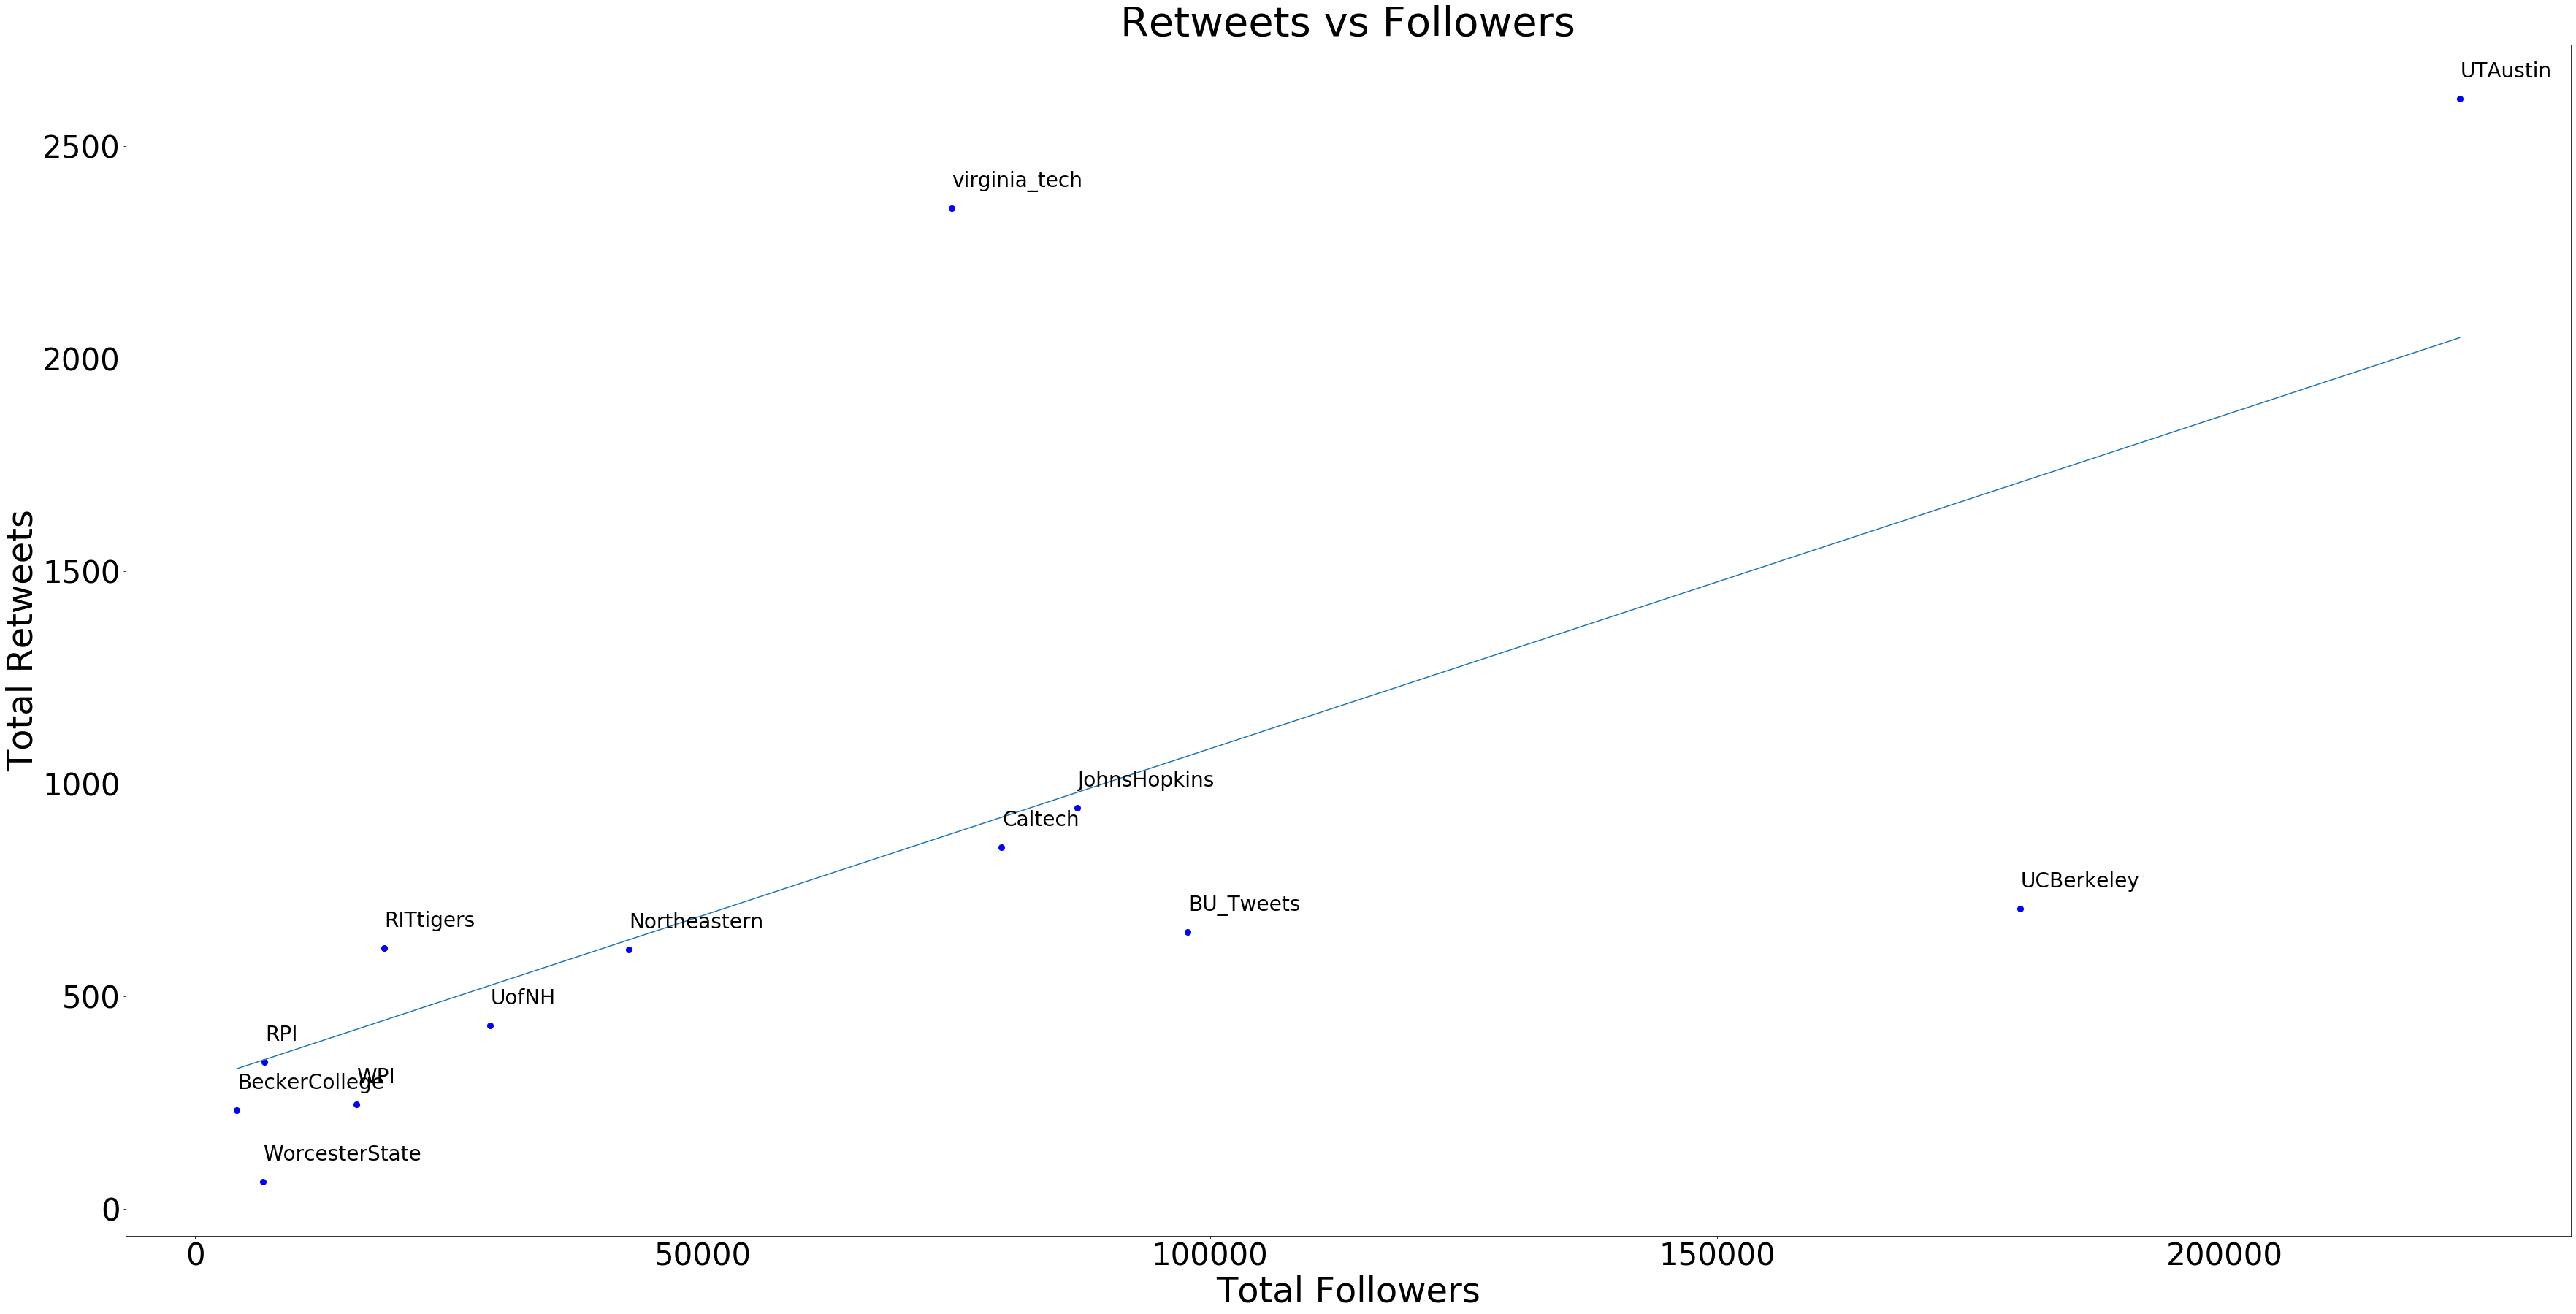

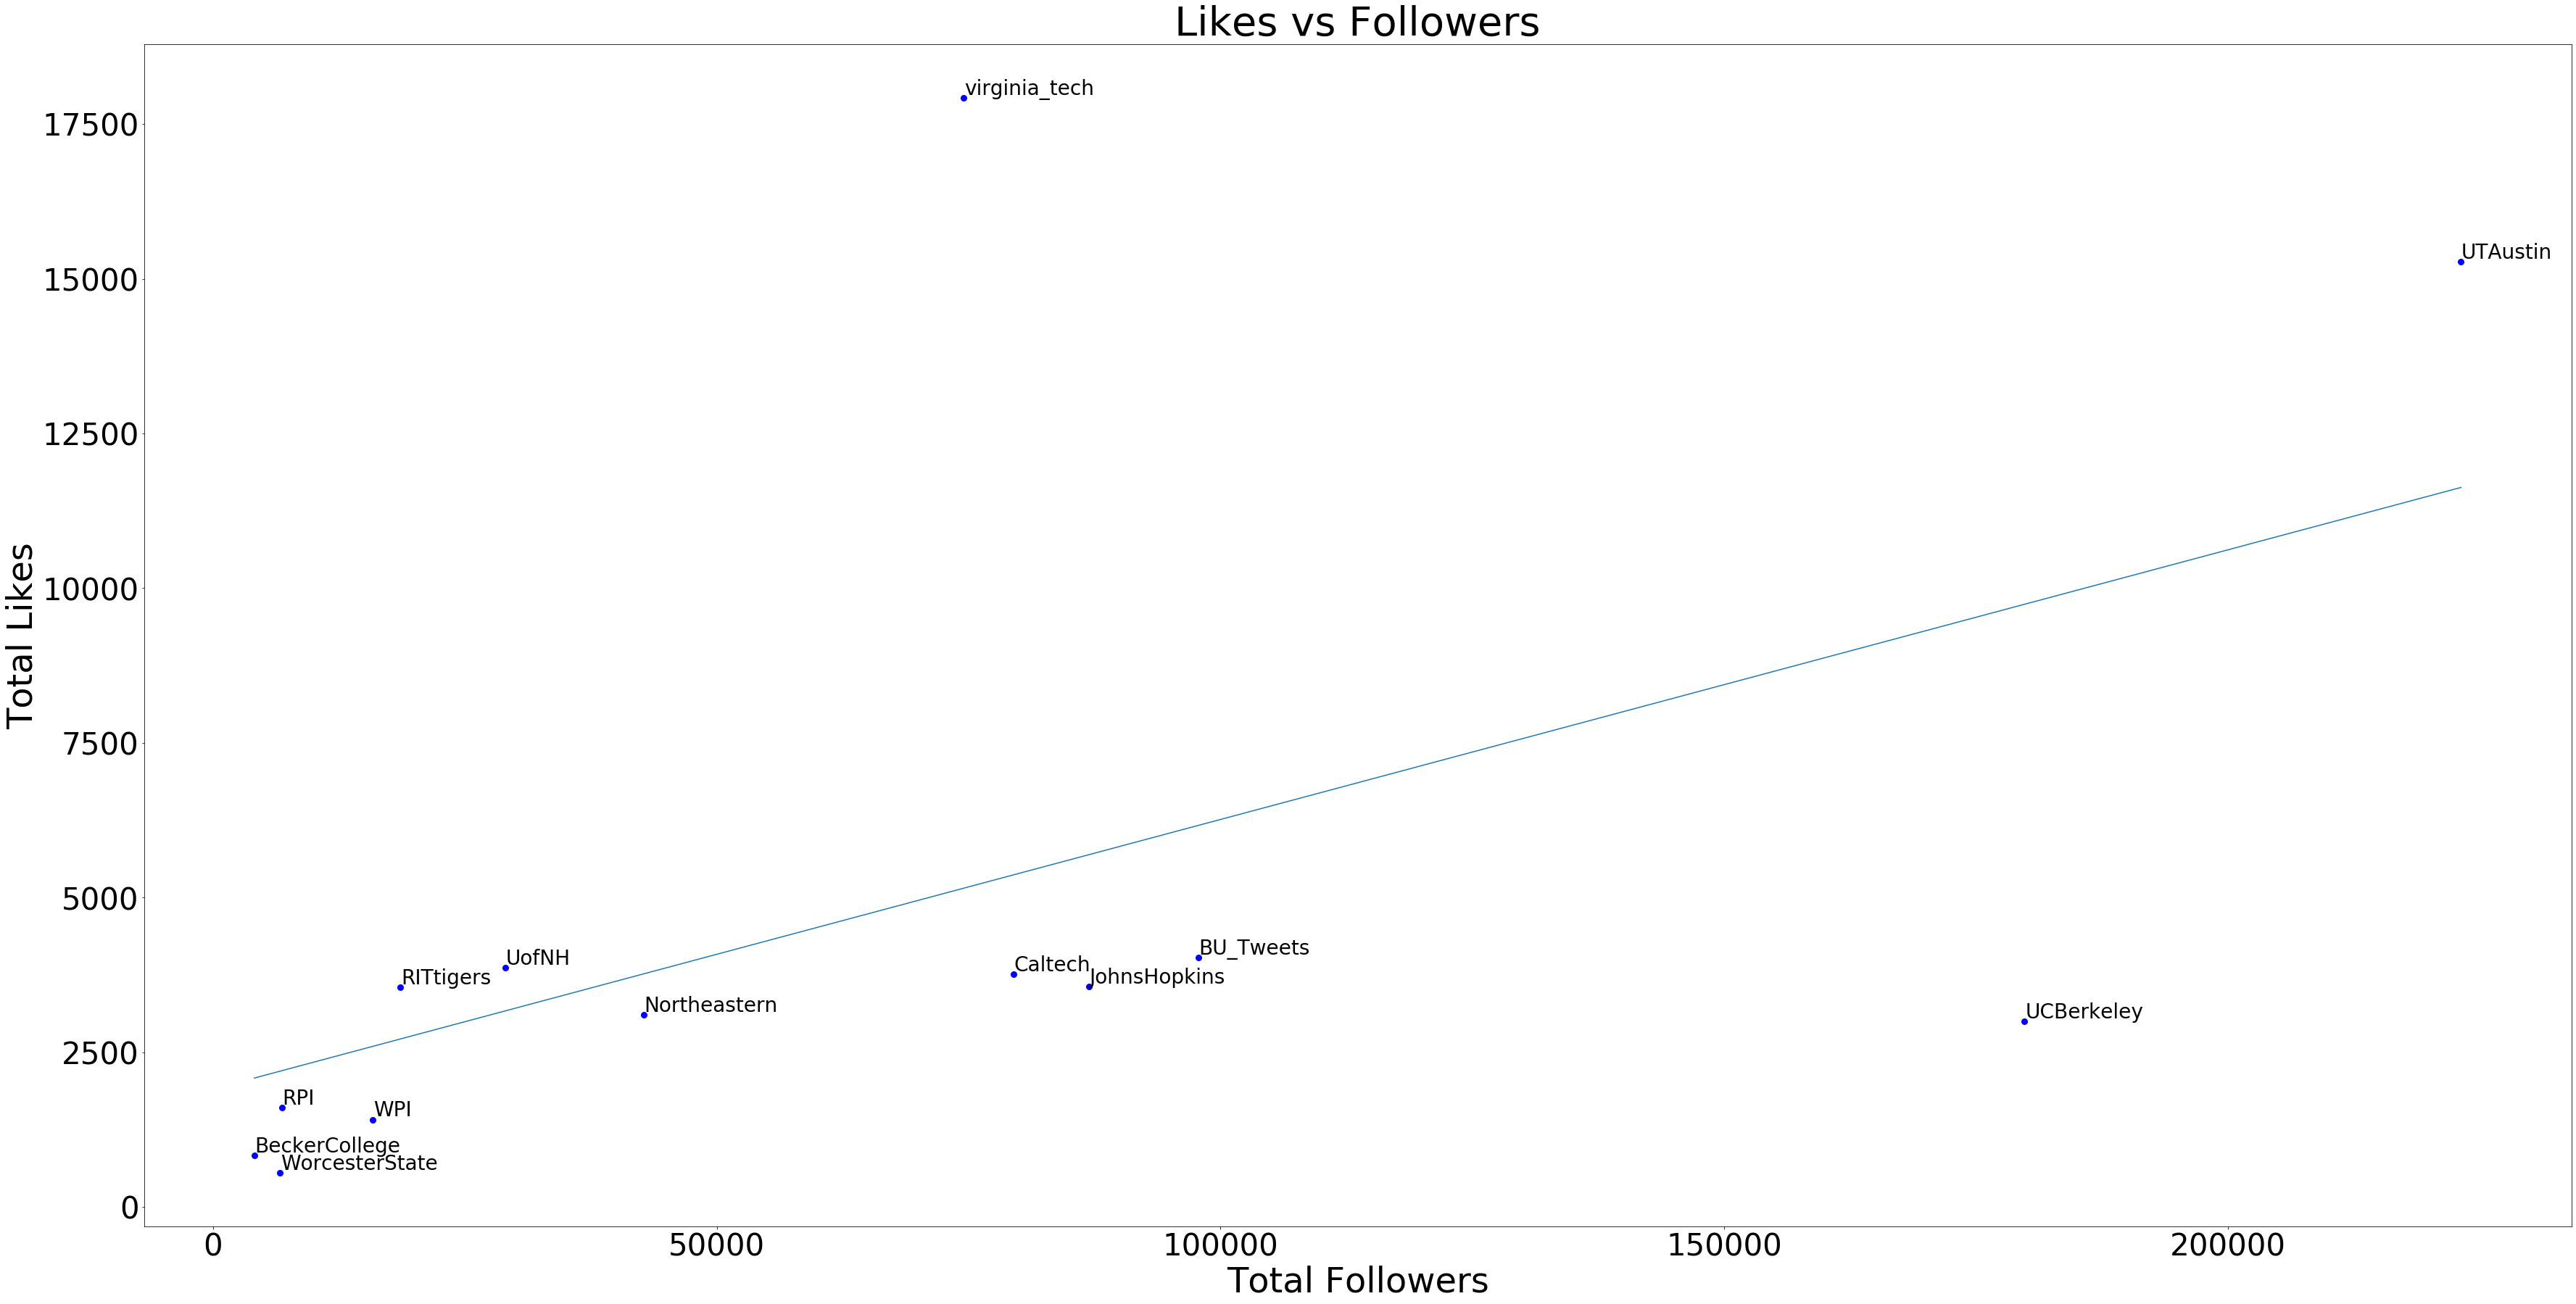

In [554]:
import matplotlib.pyplot as plt
import numpy as np


def makePlot(xName, yName, xData, yData, namesData):
    fig = plt.figure(figsize=(60,30))
    #initialize vectors of followers and list of retweets
    x = np.array(xData) #followers
    y = np.array(yData) #retweets

    #create plot using vectors with labels
    for i, uni in enumerate(namesData):
        a = x[i]
        b = y[i]
        plt.plot(a, b, 'bo', markersize=8)
        plt.text(a + 50, b + 50, uni, fontsize = 28)

    #name graph and axis
    plt.title(yName + ' vs ' + xName, fontsize = 56)
    plt.ylabel('Total ' + yName, fontsize = 48)
    plt.xlabel('Total ' + xName, fontsize = 48)
    plt.tick_params(labelsize = 42)
    
    # create prediction line of best fit
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.show()


makePlot("Followers", "Retweets", uni_followers_count, uni_retweets_count, uni_list)

makePlot("Followers", "Likes", uni_followers_count, uni_likes_count, uni_list)

In [547]:
import csv


# WPI and Universities that are performing well
popular_uni_list = ["WPI", "virginia_tech", "RITtigers", "UofNH", "UTAustin", "WorcesterState"]
for uni_handle in popular_uni_list:
    with open('Uni_Twitter_Data/' + uni_handle + '_tweets.json', 'r') as jsonfile:
        tweets_loaded = json.load(jsonfile)

        retweets = [
                    # Store out a tuple of these three values ...
                    (tweets['retweet_count'],
                     tweets['text']) 

                    # ... for each status ...
                    for tweets in tweets_loaded 

                    # ... so long as the status meets this condition.
                        if 'retweet_count' in tweets
                   ]

        favorites = [
                    # Store out a tuple of these three values ...
                    (tweets['favorite_count'],
                     tweets['text']) 

                    # ... for each status ...
                    for tweets in tweets_loaded 

                    # ... so long as the status meets this condition.
                        if 'favorite_count' in tweets
                   ]

        # Slice off the first 10 from the sorted results and display 
        # each item in the tuple

        pt_rt = PrettyTable(field_names=[uni_handle + ' Retweet Count', 'Text'])
        #turn retweets into a set to remove duplicates
        # print(retweets)

        [ pt_rt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
        sorted_retweets = sorted(retweets, reverse=True)
        with open(uni_handle + '_rts.csv', 'w', encoding = "utf-8", newline = '') as out:
            csv_out=csv.writer(out)
            csv_out.writerow(['count', 'text'])
            for row in sorted_retweets:
                csv_out.writerow(row)

        # add a row containing the next tuple
        pt_rt.max_width['Text'] = 50
        pt_rt.align= 'l'
        print(pt_rt)

        # print(favorites)
        pt_favorites = PrettyTable(field_names=[uni_handle + ' Like Count', 'Text'])

        [ pt_favorites.add_row(row) for row in sorted(favorites, reverse=True)[:10] ]
        
        pt_favorites.max_width['Text'] = 60
        pt_favorites.align= 'l'
        print(pt_favorites)
        
        sorted_favorites = sorted(favorites, reverse=True)
        with open(uni_handle + '_likes.csv', 'w', encoding = "utf-8", newline = '') as out:
            csv_out=csv.writer(out)
            csv_out.writerow(['count', 'text'])
            for row in sorted_favorites:
                csv_out.writerow(row)

+-------------------+----------------------------------------------------+
| WPI Retweet Count | Text                                               |
+-------------------+----------------------------------------------------+
| 10                | Congratulations to the newly accepted members of   |
|                   | the Class of #WPI2024!                             |
|                   |                                                    |
|                   | https://t.co/TM7Mh1B7fs https://t.co/XwCi0kqk0O    |
| 8                 | Using $2M grant from @Energy, @TimkoEnergyLab is   |
|                   | working on #research to one day enable energy-     |
|                   | producing companies… https://t.co/BQ3tHrdgsC       |
| 8                 | No matter what weather New England throws our way  |
|                   | (after all, who knows which season each of these   |
|                   | were taken in),… https://t.co/A4EAZ5IxkI           |
| 8                 | Imp

##### 

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 15 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS3010 Case Study 1 Team 2

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

** Totoal Points: 100 **


---------------------------------------------------------------------------
** Notebook results:  **
    Points: 80


    -----------------------------------
    Qestion 1:
    Points: 20
    -----------------------------------
    
    (1) Select a topic that you are interested in.
    Points: 6 
    
    (2) Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million. Please check whether the total number of tweets collected is larger than 200?
    Points: 10 
    
    
    (3) Store the tweets you downloaded into a local file (txt file or json file)
    Points: 4 
    
    
    -----------------------------------
    Qestion 2:
    Points: 20
    -----------------------------------
    
    1. Word Count

    (1) Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets.
    Points: 4 

    (2) Plot a table of the top 30 words with their counts 
    Points: 4 
    
    2. Find the most popular tweets in your collection of tweets
    plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.
    Points: 4 
    
    3. Find the most popular Tweet Entities in your collection of tweets

    (1) plot a table of the top 10 hashtags, 
    Points: 4 

    (2) top 10 user mentions that are the most popular in your collection of tweets.
    Points: 4 
    
    
    -----------------------------------
    Qestion 3:
    Points: 20
    -----------------------------------
    
    (1) choose a popular twitter user who has many followers, such as "ladygaga".
    Points: 4 

    (2) Get the list of all friends and all followers of the twitter user.
    Points: 4 

    (3) Plot 20 out of the followers, plot their ID numbers and screen names in a table.
    Points: 4 

    (4) Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.
    Points: 4 
    
    (5) Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table
    Points: 4 
  
    -----------------------------------
    Qestion 4:  Business question
    Points: 20
    -----------------------------------
        Novelty: 10
        Interestingness: 10
    -----------------------------------
    Run some additional experiments with your data to gain familiarity with the twitter data ant twitter API.  Come up with a business question and describe how Twitter data can help you answer that question.





---------------------------------------------------------------------------
** Slides (for 10 minutes of presentation): Story-telling **
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 

